# Live Well Dorset Referral Demographic Analysis
Analysis of the Live Well Dorset referral data demogrphic distributions as part of a wider analysis of the effect of professional healthcare communication on GP referral rates. 
[Research project](https://andyist.github.io/mres/)

In [2]:
# Load libraries
import pandas as pd                 # Data frames
import numpy as np                  # Numeric helpers 
import matplotlib.pyplot as plt     # Graphing
import seaborn as sns
from tableone import TableOne       # Stratification tables
import warnings                     # `do not disturbe` mode              
warnings.filterwarnings('ignore')

%run Livewell.ipynb # Project specific helpers 

#Load and prepare client data
clients = pd.read_csv("csv-data/18Jan2019/clients.csv", index_col='clientID', parse_dates=['DateRegistered','Date_registered_Month_Year'], dayfirst=True)
clients = prepare_clients(clients)

### 1. Client demographics stratified by GP/Non-GP referral source
With the pre-processed data set proced by the Livewell helper functions, stratificaiton is acocmplishaed using the TableOne library developed by Pollard et al (2018). The library takes a pandas data frame and various formatting parameteres ahead of outputting tabulated stratification results. See the docmentaiton (https://tableone.readthedocs.io/en/latest/) for usage beyond the scope of this document. 

In the case of this study, demogrphics are grouped by the binary classification of the referral source (GP/Non GP). 

In [3]:
# Setup data strucure - identify series, groups, non-normal and decimals. Add labels and output stratfied results. 
columns = ['Age','Gender','PostcodeLA','PostcodeDeprivationQuintiles']
categorical = ['PostcodeLA','Gender','PostcodeDeprivationQuintiles']
groupby = ['gp_referral']
nonnormal = ['PostcodeDeprivationQuintiles']
decimals = {"Age": 0}
labels={'gp_referral': 'GP Referral Source', 'PostcodeLA': 'Local Authority', 'PostcodeDeprivationQuintiles': 'DeprivationQuintiles'}
table1 = TableOne(clients, columns, categorical, groupby, nonnormal, labels=labels, label_suffix=True, decimals=decimals)
display(table1)

Grouped by GP Referral Source                          
                                                                                      isnull            0            1
variable                             level                                                                            
n                                                                                                   10942        10582
Age, mean (SD)                                                                            54      54 (22)      52 (19)
Gender, n (%)                        Female                                                0  8316 (76.0)  7788 (73.6)
                                     Male                                                     2626 (24.0)  2794 (26.4)
Local Authority, n (%)               Bournemouth                                           0  2919 (26.7)  2757 (26.1)
                                     Christchurch                                               477 (4.4)    507 (4.8)
                                     East Devon                                                   5 (0.0)      4 (0.0)
                                     East Dorset                                                980 (9.0)  1082 (10.2)
                                     North Dorset                                               699 (6.4)    844 (8.0)
                                     Not Available                                              408 (3.7)    298 (2.8)
                                     Poole                                                    2442 (22.3)  2368 (22.4)
                                     Purbeck                                                    675 (6.2)    578 (5.5)
                                     West Dorset                                               1058 (9.7)  1061 (10.0)
                                     Weymouth and Portland                                    1279 (11.7)  1083 (10.2)
DeprivationQuintiles, median [Q1,Q3] 20 to 40% most deprived                               0  2329 (21.3)  2298 (21.7)
                                     20% most deprived                                        2980 (27.2)  2808 (26.5)
                                     40 to 60%                                                1918 (17.5)  1913 (18.1)
                                     60 to 80% least deprived                                 1954 (17.9)  1897 (17.9)
                                     80 to 100% least deprived                                1353 (12.4)  1368 (12.9)
                                     Not Available                                              408 (3.7)    298 (2.8)
[1] Warning, Hartigan's Dip Test reports possible multimodal distributions for: Age.
[2] Warning, test for normality reports non-normal distributions for: Age.

In [4]:
# Optionally output the table to an html file
#output_html_table_file(table1)

### 2. Review Age variable distribution

(-30, 250)

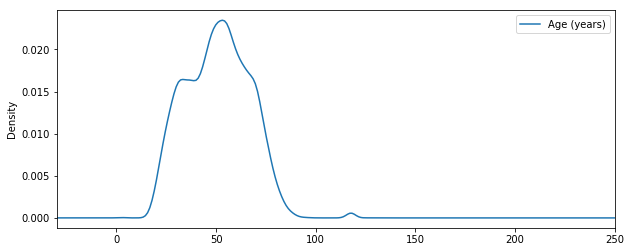

In [9]:
clients[['Age']].dropna().plot.kde(figsize=[10,4])
plt.legend(['Age (years)'])
plt.xlim([-30,250])

### 3. GP referrals by practice
To expand upon the individual client demogrpahics, a ditribution by their practice. 

In [6]:
practices.head()

NameError: name 'practices' is not defined

In [ ]:
# Group and count by practice
series.groupby([series["gp_surgery"]]).size().sort_values(ascending=False).head(10)

In [ ]:
print('Records before: ' + str(len(series.index)))
# Drop errornous top resulting values
drop_list = ['-1','0 NOT RECORDED']
series = series.loc[~series['gp_surgery'].isin(drop_list)]
# Count monthly registrations by month and location
s = series.groupby([series["YearMonth"], series["gp_surgery"]]).size().reset_index(name='counts')
print('Records after: ' + str(len(series.index)))

In [ ]:
# Plot top 10 locations delivery of referals over time
plt.figure(figsize=(10,4)).suptitle('Top 10 GP practices referral counts per month', fontsize=16)
for pname in s.sort_values(by=['counts'], ascending=False).gp_surgery.unique()[0:10] :
    # Get practice specific values
    surcount = s.loc[s['gp_surgery'] == pname]
    # Setup and create practice plot
    plt.xticks(rotation=90)
    plt.plot(surcount['YearMonth'], surcount['counts'], marker='', linewidth=1, alpha=0.4, label=pname)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [ ]:
# Referrals where a practice value was present
practices = clients.groupby('gp_surgery').count()
practices.drop_duplicates(subset="clientID", keep='first', inplace=True)
print('Referrals with practice data: ' + str(practices['gp_referral'].sum()) + ' of ' + str(clients['gp_referral'].sum()))

In [ ]:
# Count totals
referals_counts_df = clients.loc[clients['gp_referral'] == 1].groupby('gp_surgery')['gp_surgery'].count().reset_index(name='count').sort_values(['count'], ascending=False)
# Plot distribution
ax = sns.distplot(referals_counts_df['count'], bins=50)
ax.set(xlabel='Surgery', ylabel='')


In the interest of GP referal perofrmance, the top 10 practices and their referral counts are shown below. 

In [ ]:
# Show top referrers
#print(referals_counts_df.to_string(index=False))
referals_counts_df.head(10)

In [ ]:
https://www.kaggle.com/flagma/health-care-cost-analysys-prediction-python/notebook

Tom J Pollard, Alistair E W Johnson, Jesse D Raffa, Roger G Mark;
tableone: An open source Python package for producing summary statistics
for research papers, JAMIA Open, Volume 1, Issue 1, 1 July 2018, Pages 26–31,
https://doi.org/10.1093/jamiaopen/ooy012